<a href="https://colab.research.google.com/github/huimarco/youtube-data/blob/main/h3_data_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving h3VideosUpdated.csv to h3VideosUpdated.csv


In [3]:
h3 = pd.read_csv(io.BytesIO(uploaded['h3VideosUpdated.csv']))

# Data Wrangling

In [5]:
# remove first column
h3.drop(['Unnamed: 0'],axis=1,inplace=True)

# rename columns
h3.columns = ['id','published_datetime','name','description','tags',
              'duration','start_scheduled','start_actual',
              'view_count','favorite_count','like_count','comment_count']

# convert datetime_published, start_scheduled, start_scheduled
h3['published_datetime'] = pd.to_datetime(h3['published_datetime'],format='%Y-%m-%dT%H:%M:%SZ')
h3['start_scheduled'] = pd.to_datetime(h3['start_scheduled'],format='%Y-%m-%dT%H:%M:%SZ')
h3['start_actual'] = pd.to_datetime(h3['start_actual'],format='%Y-%m-%dT%H:%M:%SZ')

# convert duration
h3['duration'] = pd.to_timedelta(h3['duration'])

# filter out shorts
h3 = h3[h3['duration'] > '00:20:00']

# filter out videos before 2020
h3 = h3[h3['published_datetime']>'2020']

# reset index
h3.reset_index(drop=True,inplace=True)

# categorise by series
h3['series'] = np.where(h3.name.str.contains('After Dark|Afterdark'),'After Dark',
                        np.where(h3.name.str.contains('H3TV'),'H3TV',
                                 np.where(h3.name.str.contains('H3 Podcast'),'H3 Podcast',
                                          np.where(h3.name.str.contains('Off The Rails|OTR'),'Off The Rails',
                                                   np.where(h3.name.str.contains('Content Court'),'Content Court',
                                                            np.where(h3.name.str.contains('Leftovers'),'Leftovers',
                                                                     np.where(h3.name.str.contains('Frenemies'),'Frenemies',
                                                                              np.where(h3.name.str.contains('Families'),'Families',
                                                                                       'Other'))))))))
# fix miscategorised videos
h3.at[7,'series']='Off The Rails'
h3.at[40,'series']='After Dark'
h3.at[95,'series']='Off The Rails'
h3.at[126,'series']='Off The Rails'
h3.at[228,'series']='Families'

In [6]:
h3.describe()

,duration,view_count,favorite_count,like_count,comment_count
count,400,4.000000e+02,400.0,400.000000,400.000000
mean,0 days 02:21:05.375000,1.637193e+06,0.0,43626.577500,7629.600000
std,0 days 00:44:28.022534572,1.119460e+06,0.0,33086.355855,10598.972847
min,0 days 00:20:41,2.534150e+05,0.0,9374.000000,1179.000000
25%,0 days 01:50:20,9.970742e+05,0.0,25568.000000,3246.250000
50%,0 days 02:15:08,1.262426e+06,0.0,32039.000000,4556.500000
75%,0 days 02:57:28.250000,1.815637e+06,0.0,44560.000000,7468.000000
max,0 days 04:21:50,6.737327e+06,0.0,276575.000000,140687.000000


Note:
- favorite_count is all 0s because the metric has been deprecated

# Exploratory Data Analysis

### Top 5 videos by views, likes, and comments.

In [ ]:
h3.nlargest(5,'view_count')

,id,published_datetime,name,description,tags,duration,start_scheduled,start_actual,view_count,favorite_count,like_count,comment_count
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 02:33:23,2021-03-21 21:30:00,2021-03-21 21:28:17,6737327,0,176577,44134
278,tvFlQW3vmrk,2021-03-02 20:22:16,David Dobrik & James Charles Drama Apocalypse ...,Thank you to http://AdamAndEve.com (Use code: ...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 02:20:27,NaT,NaT,6706140,0,147480,38148
263,JIPKIuOZm9A,2021-04-02 23:31:09,James Charles’ Apology (aka Confession) - H3 A...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 03:56:25,2021-04-02 19:15:00,2021-04-02 19:19:33,6468366,0,74318,8675
267,-QLJROolYas,2021-03-23 22:16:44,Responding To David Dobrik's Apology - Frenemi...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 01:48:01,2021-03-23 20:15:00,2021-03-23 20:20:05,5746230,0,157630,21119
290,wTZVPoHp_Jk,2021-02-02 18:32:26,The David Dobrik & Jason Nash Episode - Frenem...,Thank you to http://AdamAndEve.com (Use code: ...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 01:55:24,NaT,NaT,5513184,0,139756,28568


In [ ]:
h3.nlargest(5,'like_count')

,id,published_datetime,name,description,tags,duration,start_scheduled,start_actual,view_count,favorite_count,like_count,comment_count
234,v8YqLShLJiI,2021-06-10 01:09:08,Regarding Trisha Quitting Frenemies,Become a member for access to the episodes a d...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 00:44:38,NaT,NaT,5340075,0,276575,72583
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 02:33:23,2021-03-21 21:30:00,2021-03-21 21:28:17,6737327,0,176577,44134
228,3CEMfve0fb8,2021-06-23 20:18:00,The New Host Of Frenemies Is…,Become a member for access to the episodes a d...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 01:34:37,NaT,NaT,2979490,0,172776,27126
229,Fvg5RTrFLfI,2021-06-22 01:04:17,Ethan Klein Debates Steven Crowder (Ft. Sam Se...,Thank you to Steven Crowder for coming on the ...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 00:41:27,NaT,NaT,3115294,0,169438,140687
267,-QLJROolYas,2021-03-23 22:16:44,Responding To David Dobrik's Apology - Frenemi...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 01:48:01,2021-03-23 20:15:00,2021-03-23 20:20:05,5746230,0,157630,21119


In [ ]:
h3.nlargest(5,'comment_count')

,id,published_datetime,name,description,tags,duration,start_scheduled,start_actual,view_count,favorite_count,like_count,comment_count
229,Fvg5RTrFLfI,2021-06-22 01:04:17,Ethan Klein Debates Steven Crowder (Ft. Sam Se...,Thank you to Steven Crowder for coming on the ...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 00:41:27,NaT,NaT,3115294,0,169438,140687
234,v8YqLShLJiI,2021-06-10 01:09:08,Regarding Trisha Quitting Frenemies,Become a member for access to the episodes a d...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 00:44:38,NaT,NaT,5340075,0,276575,72583
235,poqMtuBVHU4,2021-06-08 17:44:36,Talking About Gabbie Hanna - Frenemies # 39,Thank you to http://Upstart.com/Frenemies & ht...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 01:39:28,NaT,NaT,5245137,0,106704,71941
306,9XLd81tC-uQ,2020-12-10 22:52:39,Trisha Quits the Podcast & Storms Out - Frenem...,Become a member for access to the episodes a d...,"['h3 podcast', 'h3h3 podcast', 'the h3 podcast...",0 days 00:50:11,NaT,NaT,4360808,0,117410,61770
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 02:33:23,2021-03-21 21:30:00,2021-03-21 21:28:17,6737327,0,176577,44134


### Average views by month year

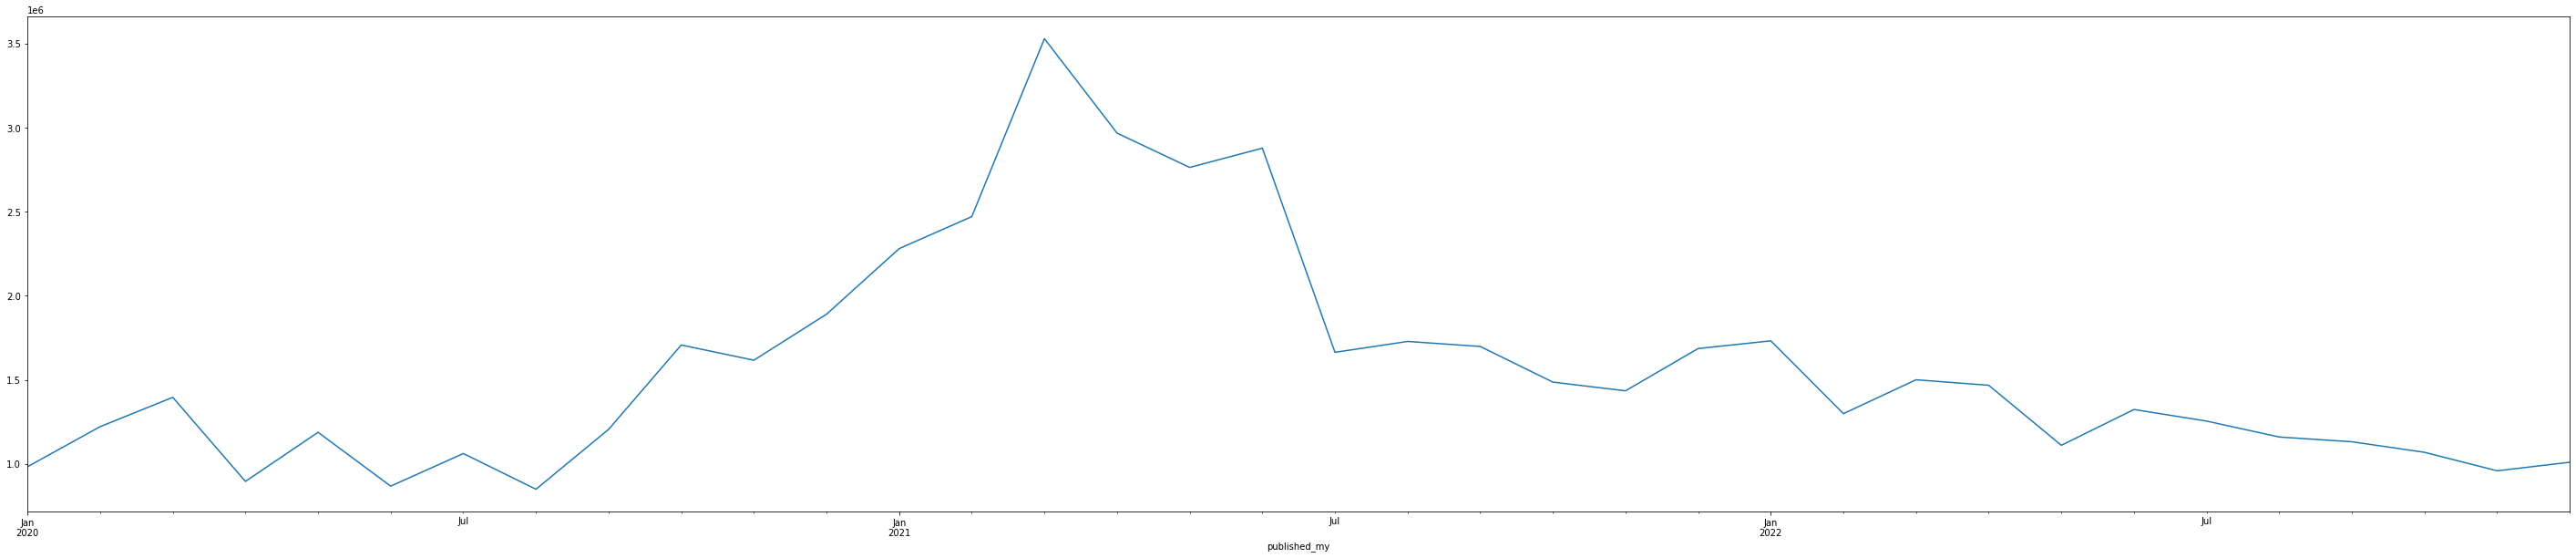

In [ ]:
h3['published_my'] = h3['published_datetime'].dt.to_period('M')
h3.groupby(['published_my'])['view_count'].mean().plot(kind='line',figsize=(50,10))

### Average views by week month year

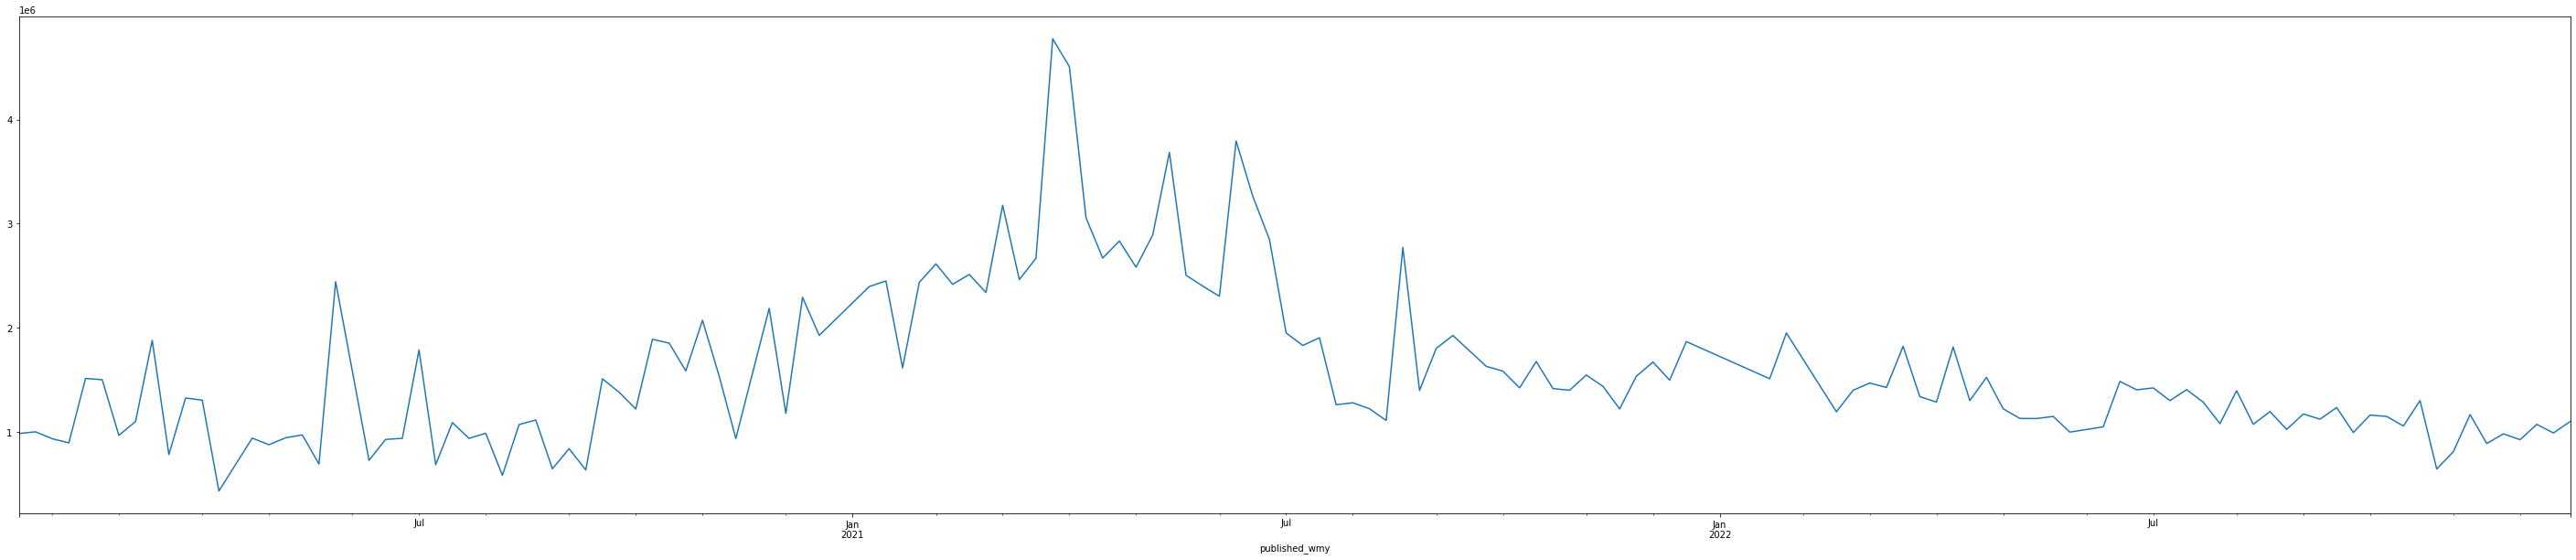

In [ ]:
h3['published_wmy'] = h3['published_datetime'].dt.to_period('W')
h3.groupby(['published_wmy'])['view_count'].mean().plot(kind='line',figsize=(50,10))

### Average duration by week month year

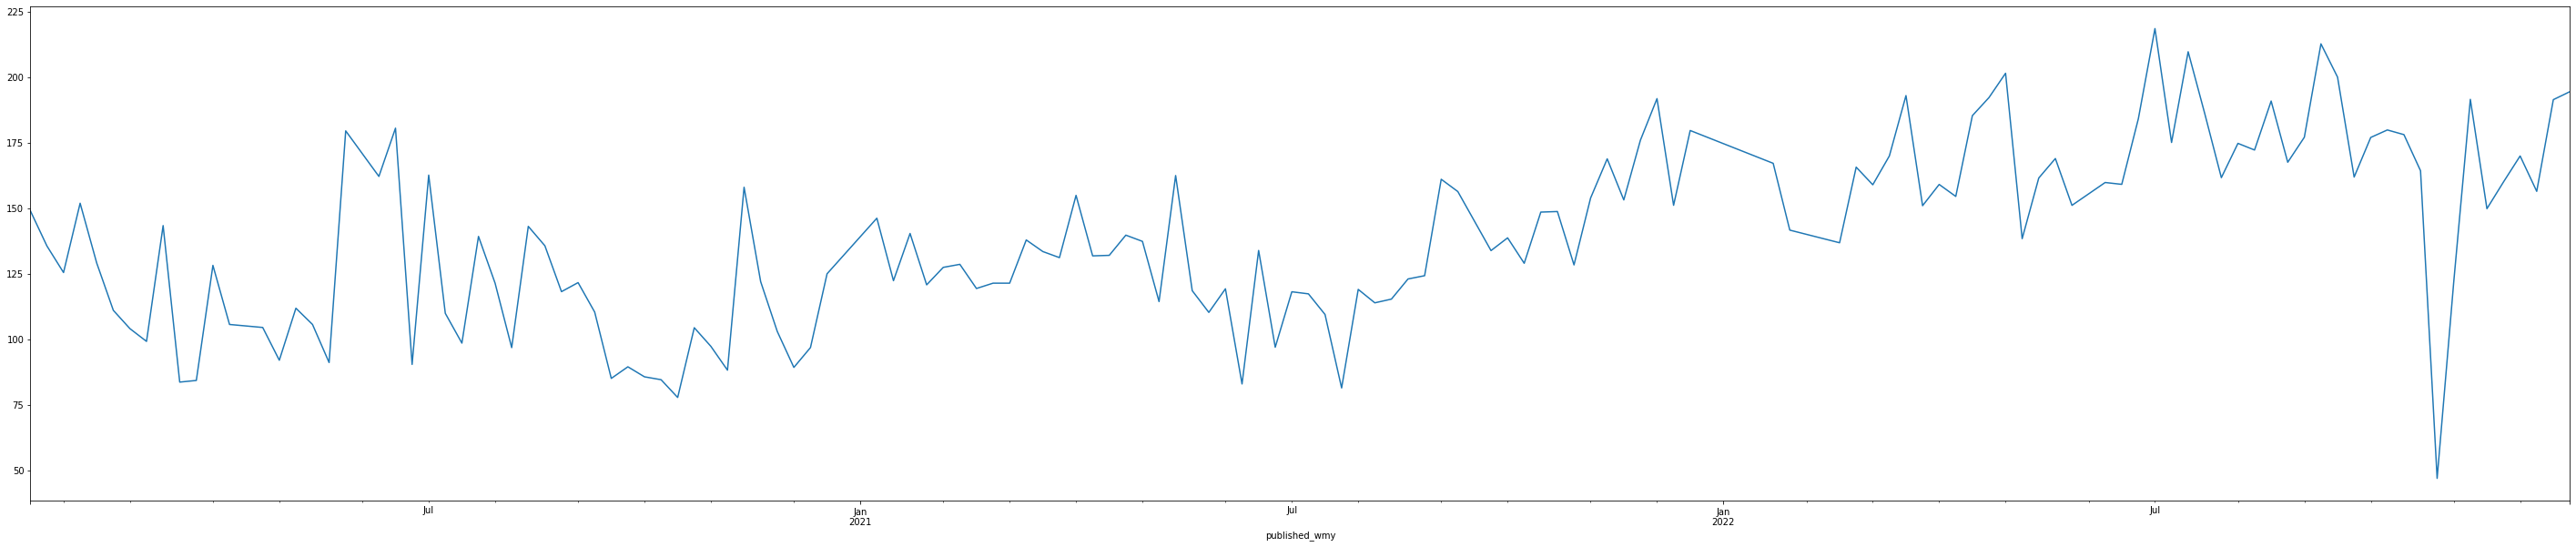

In [ ]:
h3['duration_s'] = h3['duration'].dt.total_seconds()/60
h3.groupby(['published_wmy'])['duration_s'].mean().plot(kind='line',figsize=(50,10))

Note: 
- Average duration is particularly low on the week of 2022-10-24/2022-10-30 because there was a channel ban (only the short halloween special)

# Likes

In [13]:
h3['like_view_ratio'] = h3['like_count'] / h3['view_count']

In [14]:
h3['like_view_ratio'].describe()

count    400.000000
mean       0.027100
std        0.007763
min        0.011489
25%        0.022216
50%        0.025672
75%        0.029920
max        0.066994
Name: like_view_ratio, dtype: float64

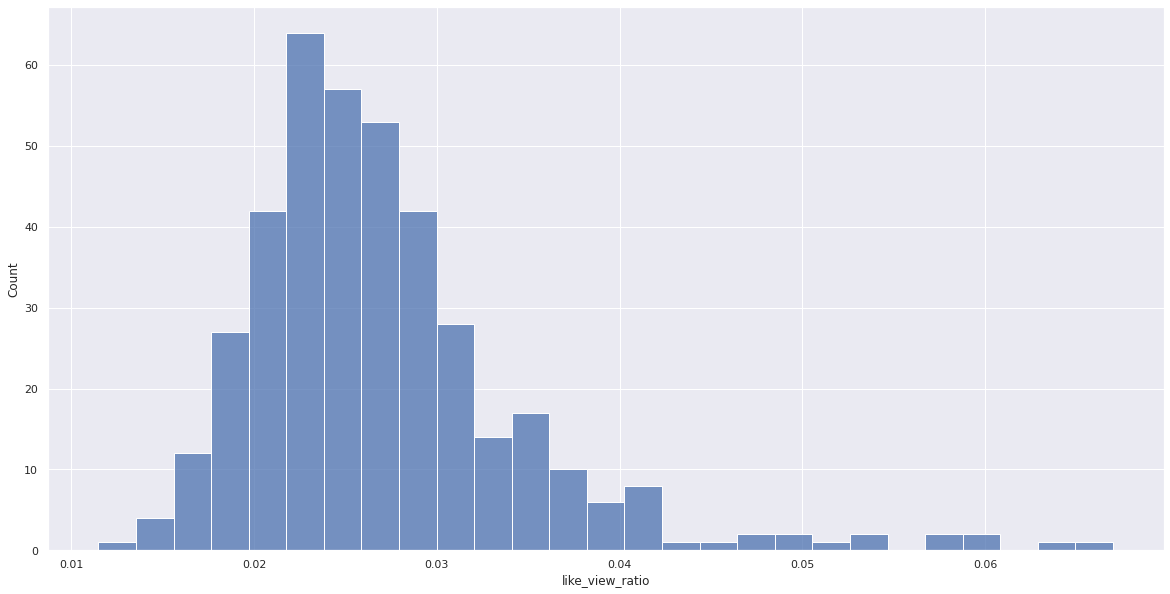

In [15]:
sns.histplot(data=h3,
             x='like_view_ratio')

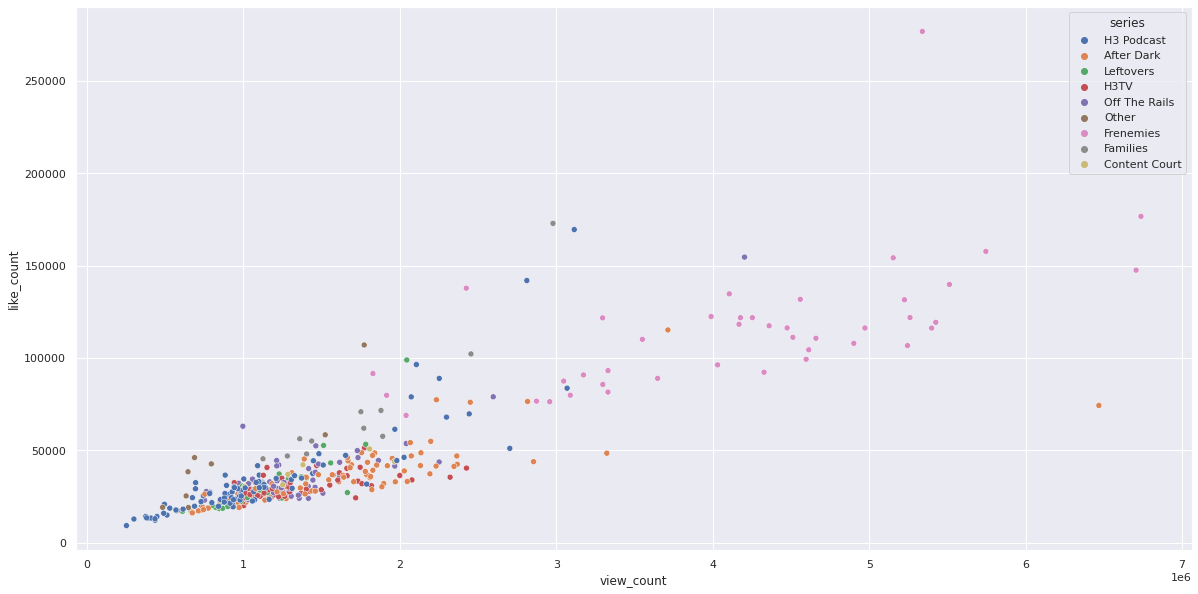

In [12]:
sns.set(rc={'figure.figsize':(20,10)})

sns.scatterplot(data=h3,
                x='view_count',
                y='like_count',
                hue='series')

# Which series is the most popular?

Notes:
- Silent Libary videos are under 'Off The Rails'
- Frenemies Vlogs are under 'Frenemies'
- Off the Rail videos published before the official 'Off The Rails #1' are under 'H3 Podcast' 

In [ ]:
len(h3[h3['series']=='H3 Podcast'])

92

### Total views percentage breakdown by series
Despite having fewer episodes, Frenemies achieved more total views than After Dark, Off the Rails, and H3 Podcast.

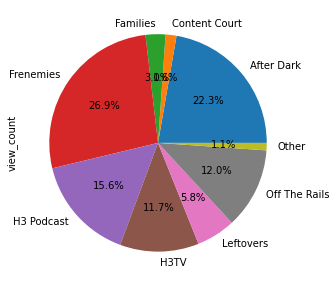

In [ ]:
h3.groupby(['series'])['view_count'].sum().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.axis('off')

### Average views by series
Frenemies, After Dark, and Families all average over 1.5 in views.

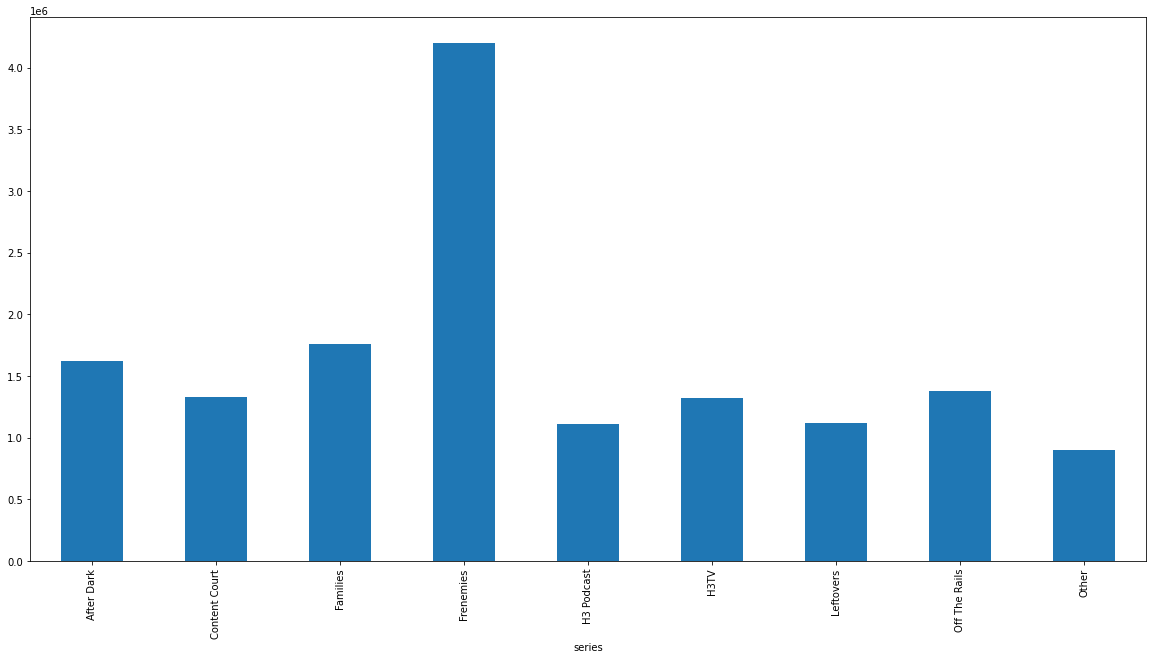

In [ ]:
h3.groupby(['series'])['view_count'].mean().plot(kind='bar',figsize=(20,10))

### Total views distribution by series
Frenemies and After Dark have the largest spread in views while Leftovers has the smallest.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


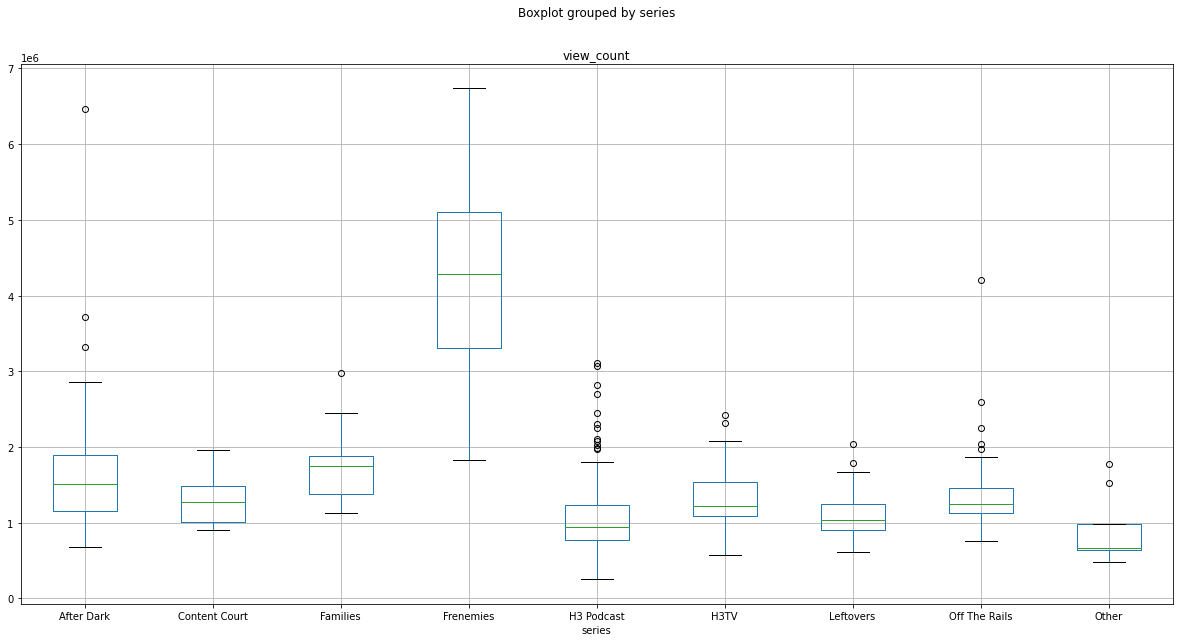

In [ ]:
h3.boxplot(column='view_count',by='series',figsize=(20,10))

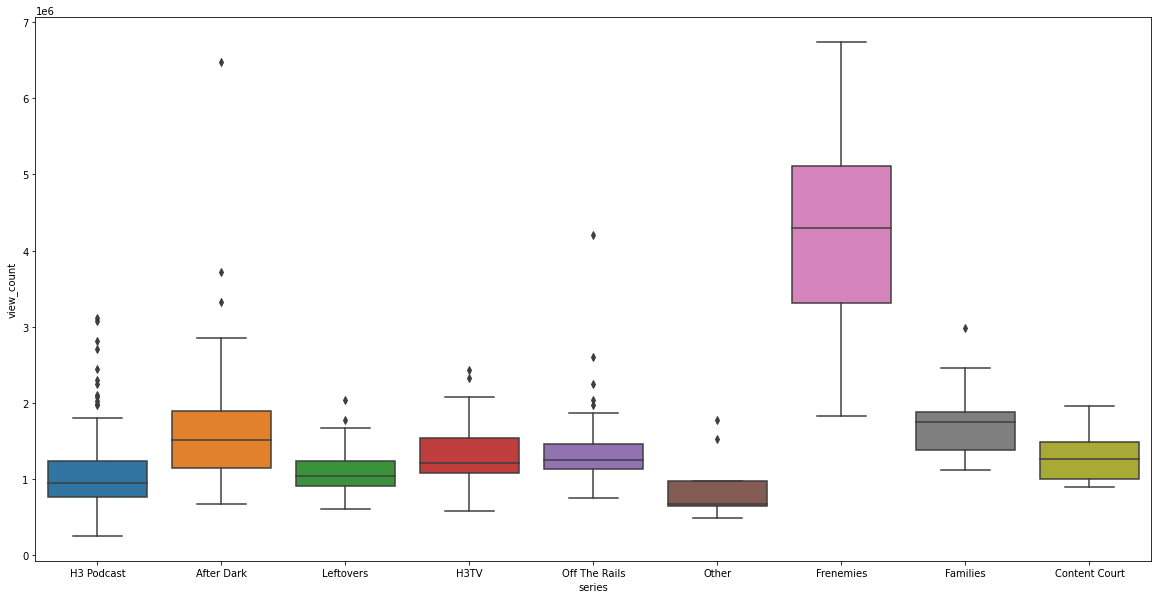

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=h3,x='series',y='view_count')

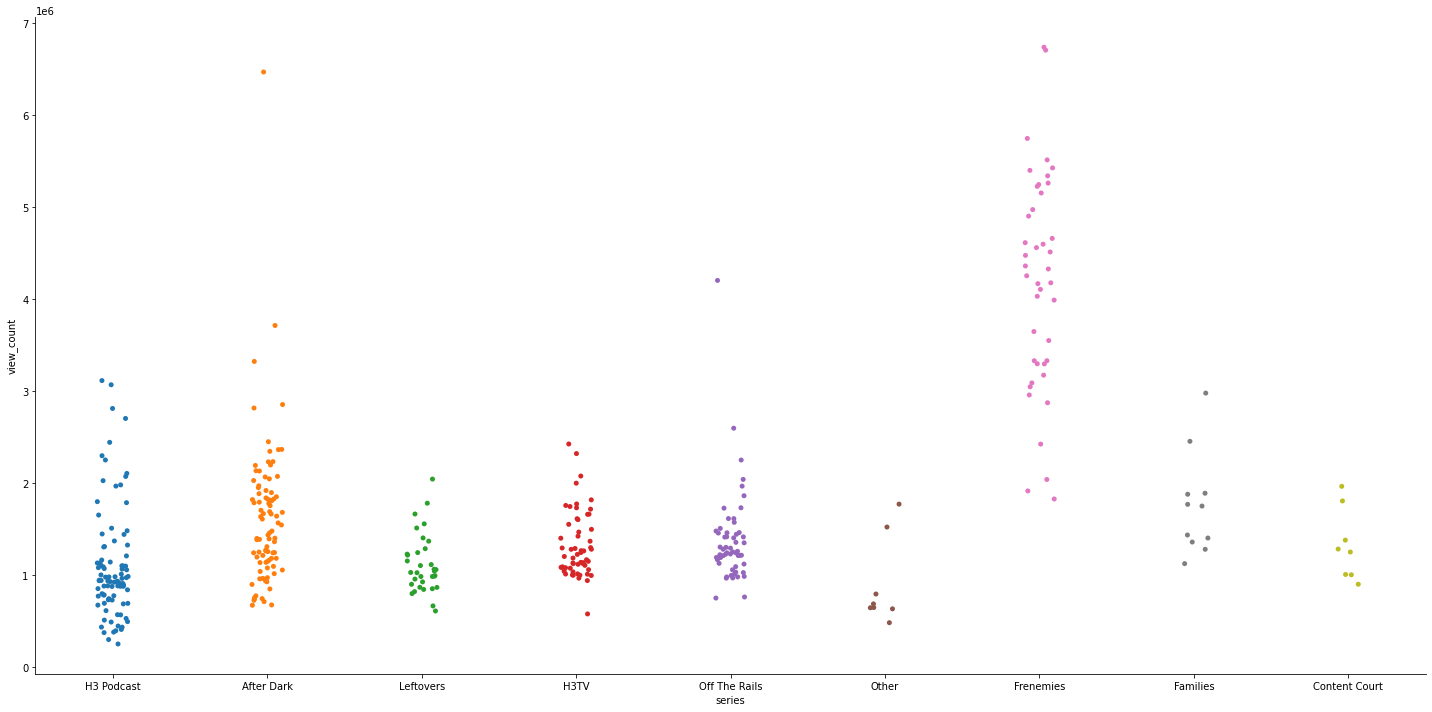

In [ ]:
sns.catplot(data=h3,x='series',y='view_count',height=10,aspect=2)

# Correlation between duration and views

In [ ]:
h3['duration_s'].corr(h3['view_count'])

0.28840864522132387

<Figure size 3600x720 with 0 Axes>

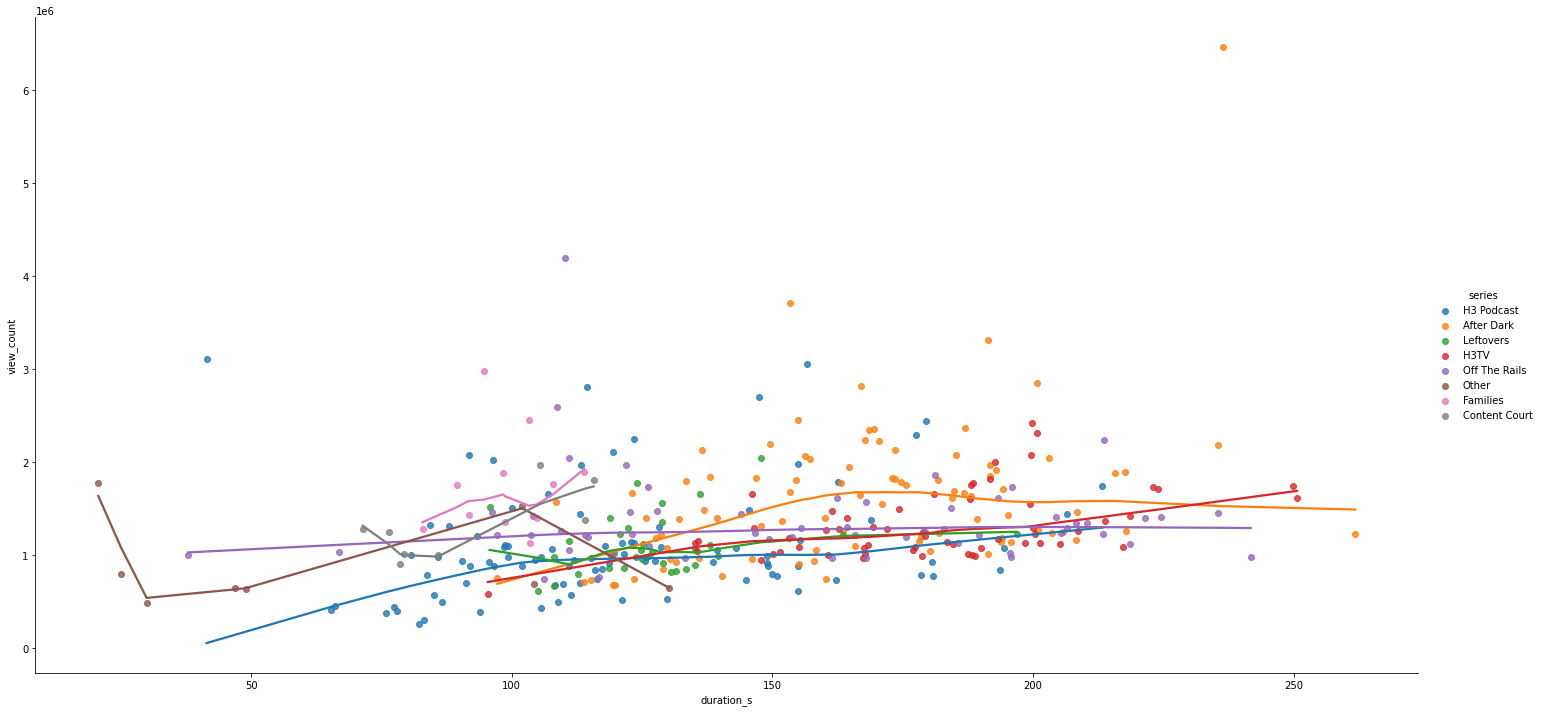

In [ ]:
plt.figure(figsize=(50,10))
sns.lmplot(data=h3,
           x='duration_s',y='view_count',
           hue='series',
           lowess=True,
           height=10,aspect=2)

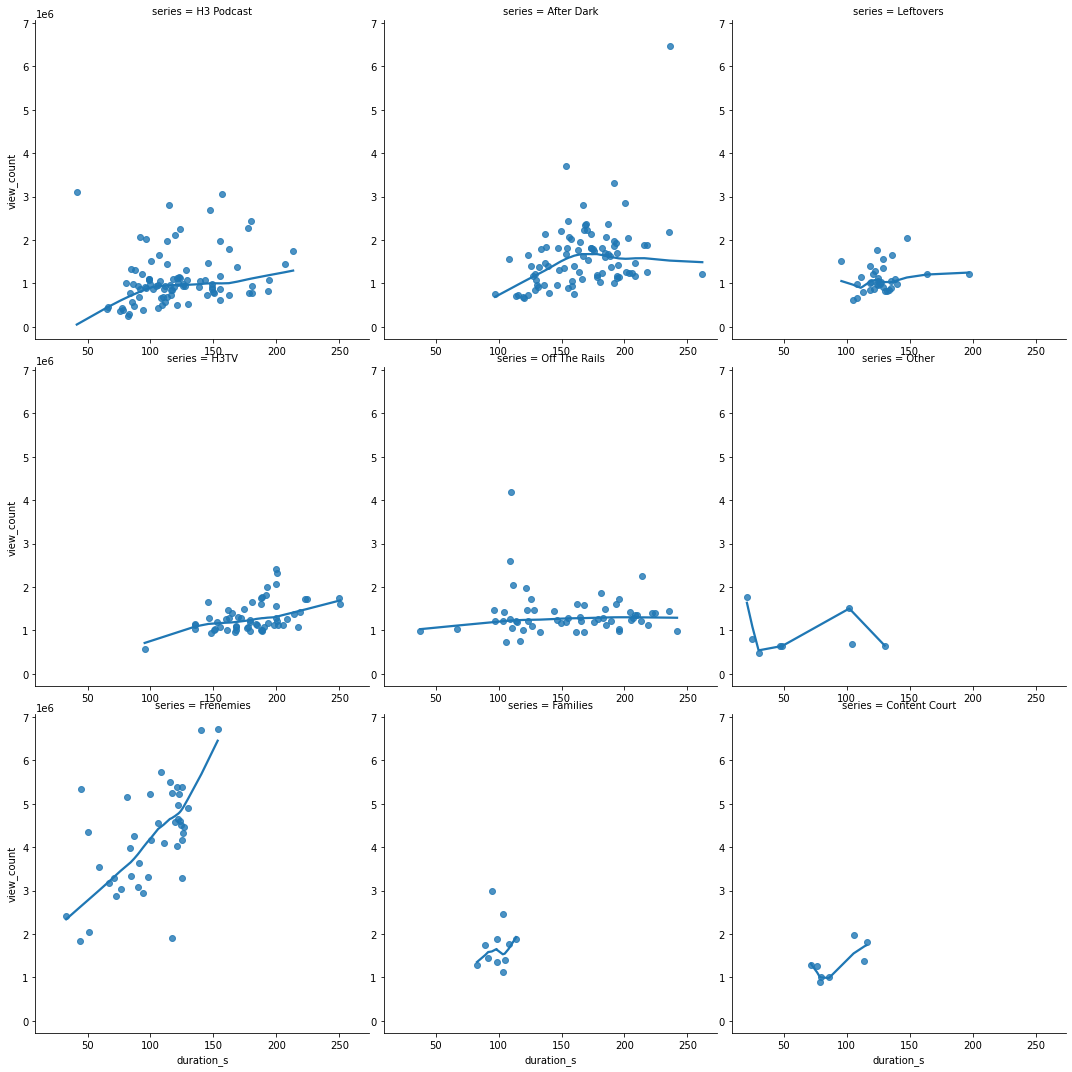

In [ ]:
g = sns.lmplot(data=h3,
               x='duration_s',y='view_count',
               col='series',col_wrap=3,
               lowess=True)
    
for axis in g.axes.flat:
  axis.tick_params(labelbottom=True,labelleft=True)

plt.show()

# Correlation between longer titles and views

In [ ]:
h3['title'] = h3['name'].str.rsplit('-',1,expand=True)[0]
h3['title_len'] = h3['title'].str.len()

<ipython-input-56-cd0d9e4e2226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3_nofrenemies['title'] = h3_nofrenemies['name'].str.rsplit('-',1,expand=True)[0]
<ipython-input-56-cd0d9e4e2226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3_nofrenemies['title_len'] = h3_nofrenemies['title'].str.len()


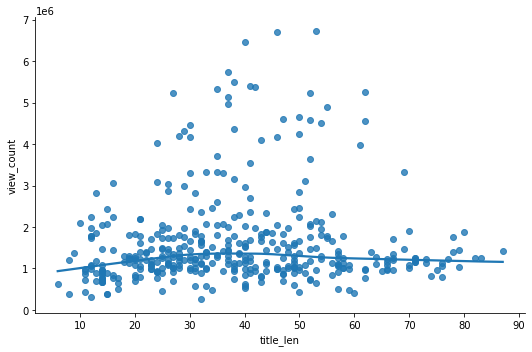

In [ ]:
sns.lmplot(data=h3,
           x='title_len',
           y='view_count',
           lowess=True,
           height=5,aspect=1.5)

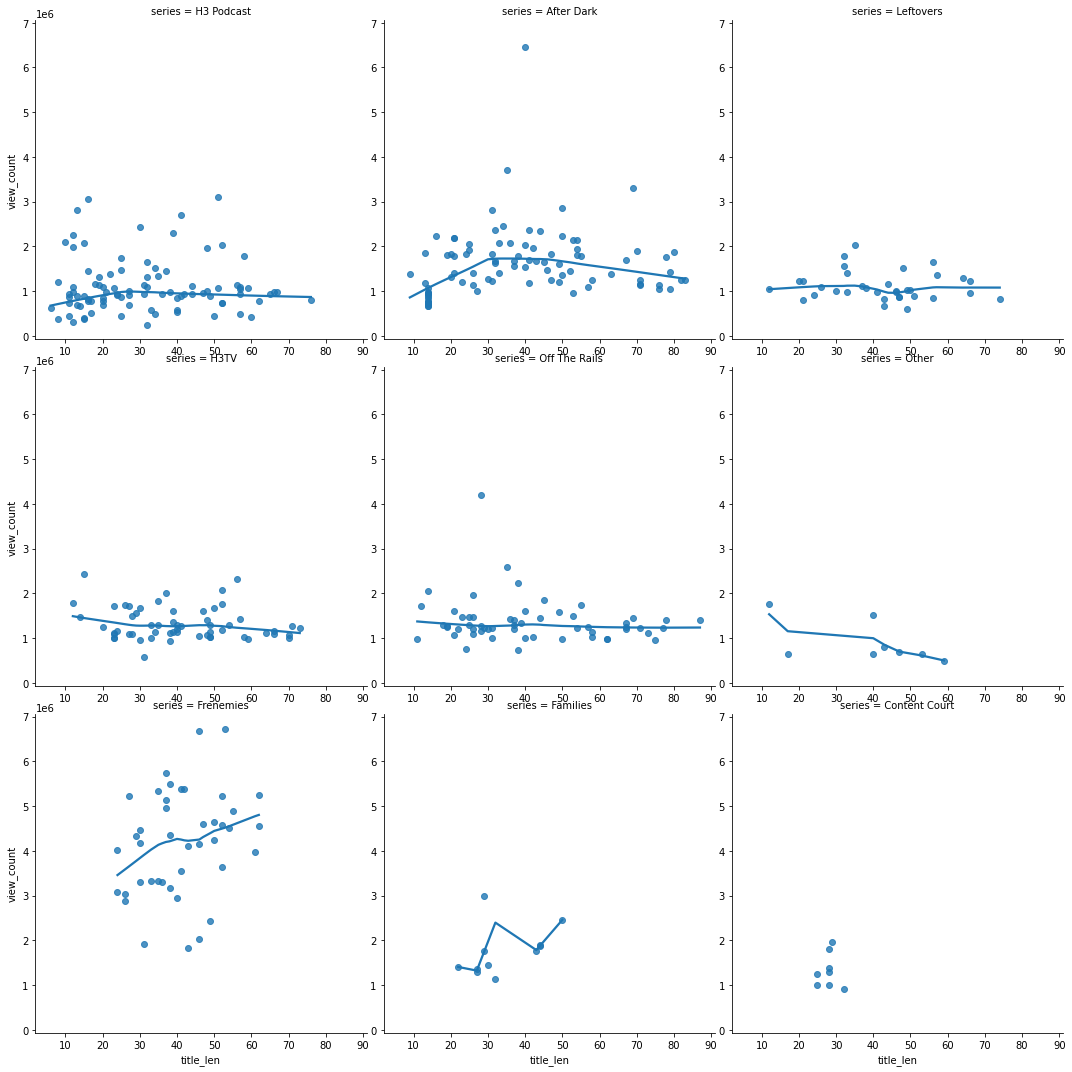

In [ ]:
g = sns.lmplot(data=h3,
               x='title_len',y='view_count',
               col='series',col_wrap=3,
               lowess=True)
    
for axis in g.axes.flat:
  axis.tick_params(labelbottom=True,labelleft=True)

plt.show()

# Exclude Frenemies

In [ ]:
h3_nofrenemies = h3[h3['series']!='Frenemies']

In [ ]:
len(h3_nofrenemies)

358

# Show Overview

In [ ]:
h3_nofrenemies.describe()

,duration,view_count,like_count,comment_count,duration_s,title_len
count,358,3.580000e+02,358.000000,358.000000,358.000000,358.000000
mean,0 days 02:25:58.189944134,1.334541e+06,35205.108939,5696.343575,145.969832,37.667598
std,0 days 00:43:24.109539945,6.163706e+05,20181.592235,8085.601135,43.401826,18.167864
min,0 days 00:20:41,2.533790e+05,9373.000000,1180.000000,20.683333,6.000000
25%,0 days 01:53:56.500000,9.748612e+05,25003.500000,3179.500000,113.941667,23.250000
50%,0 days 02:26:04,1.214434e+06,29988.000000,4247.500000,146.066667,35.500000
75%,0 days 03:00:30.250000,1.614582e+06,39210.750000,6159.500000,180.504167,50.000000
max,0 days 04:21:50,6.464314e+06,172774.000000,140706.000000,261.833333,87.000000


In [ ]:
h3[h3['series']!='Frenemies'].nlargest(10,'view_count')

,id,published_datetime,name,description,duration,view_count,like_count,comment_count,series,duration_s,published_wmy
263,JIPKIuOZm9A,2021-04-02 23:31:09,James Charles’ Apology (aka Confession) - H3 A...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,0 days 03:56:25,6464314,74303,8677,After Dark,236.416667,2021-03-29/2021-04-04
206,jFG57UkVvx8,2021-08-19 23:41:23,I'm Done With Trisha Paytas - Off The Rails #8,Thank you to http://curology.com/H3 & http://k...,0 days 01:50:11,4198627,154516,30717,Off The Rails,110.183333,2021-08-16/2021-08-22
230,8aCfvBnOcnU,2021-06-18 22:31:59,The Real Reason Frenemies Broke Up - H3 After ...,Thank you to http://Kraken.com/H3AD & http://P...,0 days 02:33:25,3713172,115149,14756,After Dark,153.416667,2021-06-14/2021-06-20
297,QBmlIdXpGeU,2021-01-15 23:47:18,"Trisha Paytas, Jeffree Star, Hair By Jay, D'An...",Thank you to http://Keeps.com/h3 & http://Upst...,0 days 03:11:26,3313961,48520,7106,After Dark,191.433333,2021-01-11/2021-01-17
229,Fvg5RTrFLfI,2021-06-22 01:04:17,Ethan Klein Debates Steven Crowder (Ft. Sam Se...,Thank you to Steven Crowder for coming on the ...,0 days 00:41:27,3112784,169414,140706,H3 Podcast,41.450000,2021-06-21/2021-06-27
118,ppyW70czRqU,2022-04-08 22:34:23,Brittany Broski - H3 Podcast #249,Thank you to http://mintmobile.com/afterdark &...,0 days 02:36:36,3059909,83606,7996,H3 Podcast,156.600000,2022-04-04/2022-04-10
228,3CEMfve0fb8,2021-06-23 20:18:00,The New Host Of Frenemies Is…,Become a member for access to the episodes a d...,0 days 01:34:37,2978850,172774,27151,Families,94.616667,2021-06-21/2021-06-27
246,4CP_nl037_c,2021-05-13 22:59:40,James Charles Is Being Sued & Bill Gates Calls...,Thank you to http://MeUndies.com/H3 for sponso...,0 days 03:20:45,2854549,43938,6068,After Dark,200.750000,2021-05-10/2021-05-16
232,uvc-dX0fG3s,2021-06-11 22:37:20,And The Number Of Babies Is... - H3 After Dark...,Thank you to http://ShadyRays.com (use code: H...,0 days 02:47:04,2816735,76490,9275,After Dark,167.066667,2021-06-07/2021-06-13
231,2jFIQr_cVz4,2021-06-17 20:47:00,Bella Poarch - H3 Podcast # 247,Thank you to http://Canva.me/H3 & http://MeUnd...,0 days 01:54:24,2811769,141874,15819,H3 Podcast,114.400000,2021-06-14/2021-06-20


# Most and least popular words in title

In [ ]:
#nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords 
stop = stopwords.words('english')
stop.append('&')

In [ ]:
h3_nofrenemies['title_no_stopwords'] = h3_nofrenemies['title'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-81-4d377dd9cbfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3_nofrenemies['title_no_stopwords'] = h3_nofrenemies['title'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [ ]:
h3_top = h3_nofrenemies.nlargest(179,'view_count')
h3_bottom = h3_nofrenemies.nsmallest(179,'view_count')

In [ ]:
Counter(' '.join(h3_top['title_no_stopwords']).split()).most_common(20)

[('james', 16),
 ('david', 16),
 ('dobrik', 13),
 ('charles', 12),
 ('family', 12),
 ('trisha', 10),
 ('ace', 10),
 ('ethan', 9),
 ('calls', 9),
 ('jeff', 7),
 ('paytas', 6),
 ('new', 6),
 ('mom', 6),
 ('jordan', 6),
 ('sued', 5),
 ('vs', 5),
 ('shane', 5),
 ('youtube', 5),
 ("i'm", 4),
 ('real', 4)]

In [ ]:
Counter(' '.join(h3_bottom['title_no_stopwords']).split()).most_common(20)

[('h3', 17),
 ('dark', 15),
 ('ethan', 13),
 ('elon', 9),
 ('got', 9),
 ('calls', 8),
 ('andrew', 7),
 ('banned', 6),
 ('trump', 6),
 ('paul', 6),
 ('new', 6),
 ('us', 5),
 ('jake', 5),
 ('musk', 5),
 ('tim', 4),
 ('keemstar', 4),
 ('go', 4),
 ('family', 4),
 ('lee', 4),
 ('david', 4)]

# Tardiness
Live episodes start 7.8 minutes late on average. 

In [ ]:
h3_streams = h3[h3['start_scheduled'].notnull()]

In [ ]:
h3_streams['start_dif'] = (h3_streams['start_actual'] - h3_streams['start_scheduled']).dt.total_seconds()/60
h3_streams['tardy'] = h3_streams['start_dif'] > 0

In [ ]:
h3_streams[h3_streams['series']=='Frenemies']

,id,published_datetime,name,description,tags,duration,start_scheduled,start_actual,view_count,favorite_count,like_count,comment_count,published_my,published_wmy,duration_s,series,start_dif,tardy
267,-QLJROolYas,2021-03-23 22:16:44,Responding To David Dobrik's Apology - Frenemi...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 01:48:01,2021-03-23 20:15:00,2021-03-23 20:20:05,5746230,0,157630,21119,2021-03,2021-03-22/2021-03-28,108.016667,Frenemies,5.083333,True
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,"['h3h3', 'h3', 'h3 after dark', 'h3h3productio...",0 days 02:33:23,2021-03-21 21:30:00,2021-03-21 21:28:17,6737327,0,176577,44134,2021-03,2021-03-22/2021-03-28,153.383333,Frenemies,-1.716667,False


In [ ]:
h3_streams['start_dif'].describe()

count    229.000000
mean       7.884571
std        7.798777
min      -28.216667
25%        3.150000
50%        7.600000
75%       12.683333
max       28.933333
Name: start_dif, dtype: float64

### Difference by episode

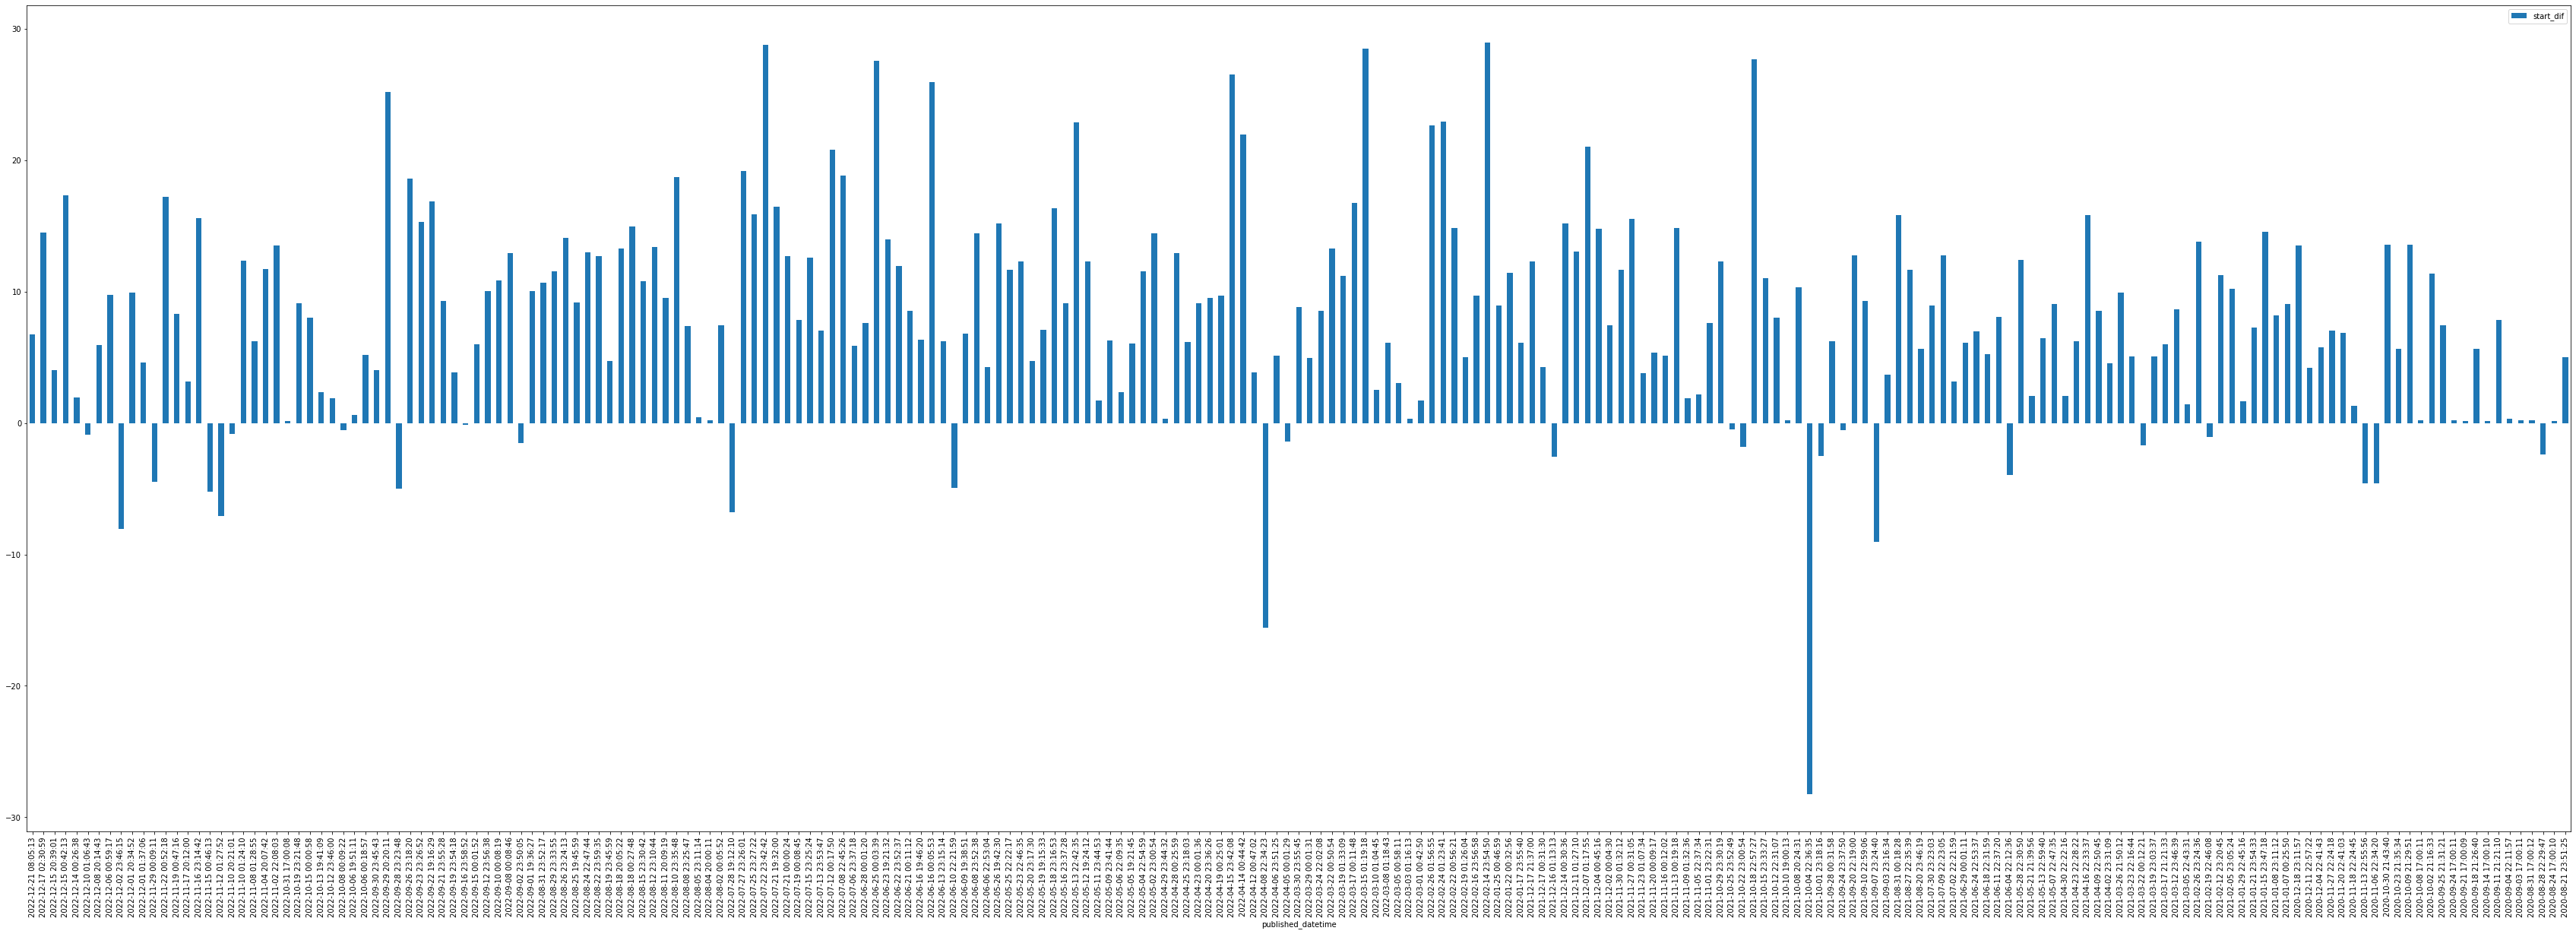

In [ ]:
h3_streams.plot(kind='bar',
                x='published_datetime',
                y='start_dif',
                figsize=(60,20))

In [ ]:
h3_streams.plot(kind='bar',
                x='published_datetime',
                y='start_dif',
                figsize=(60,20))

### Difference by week

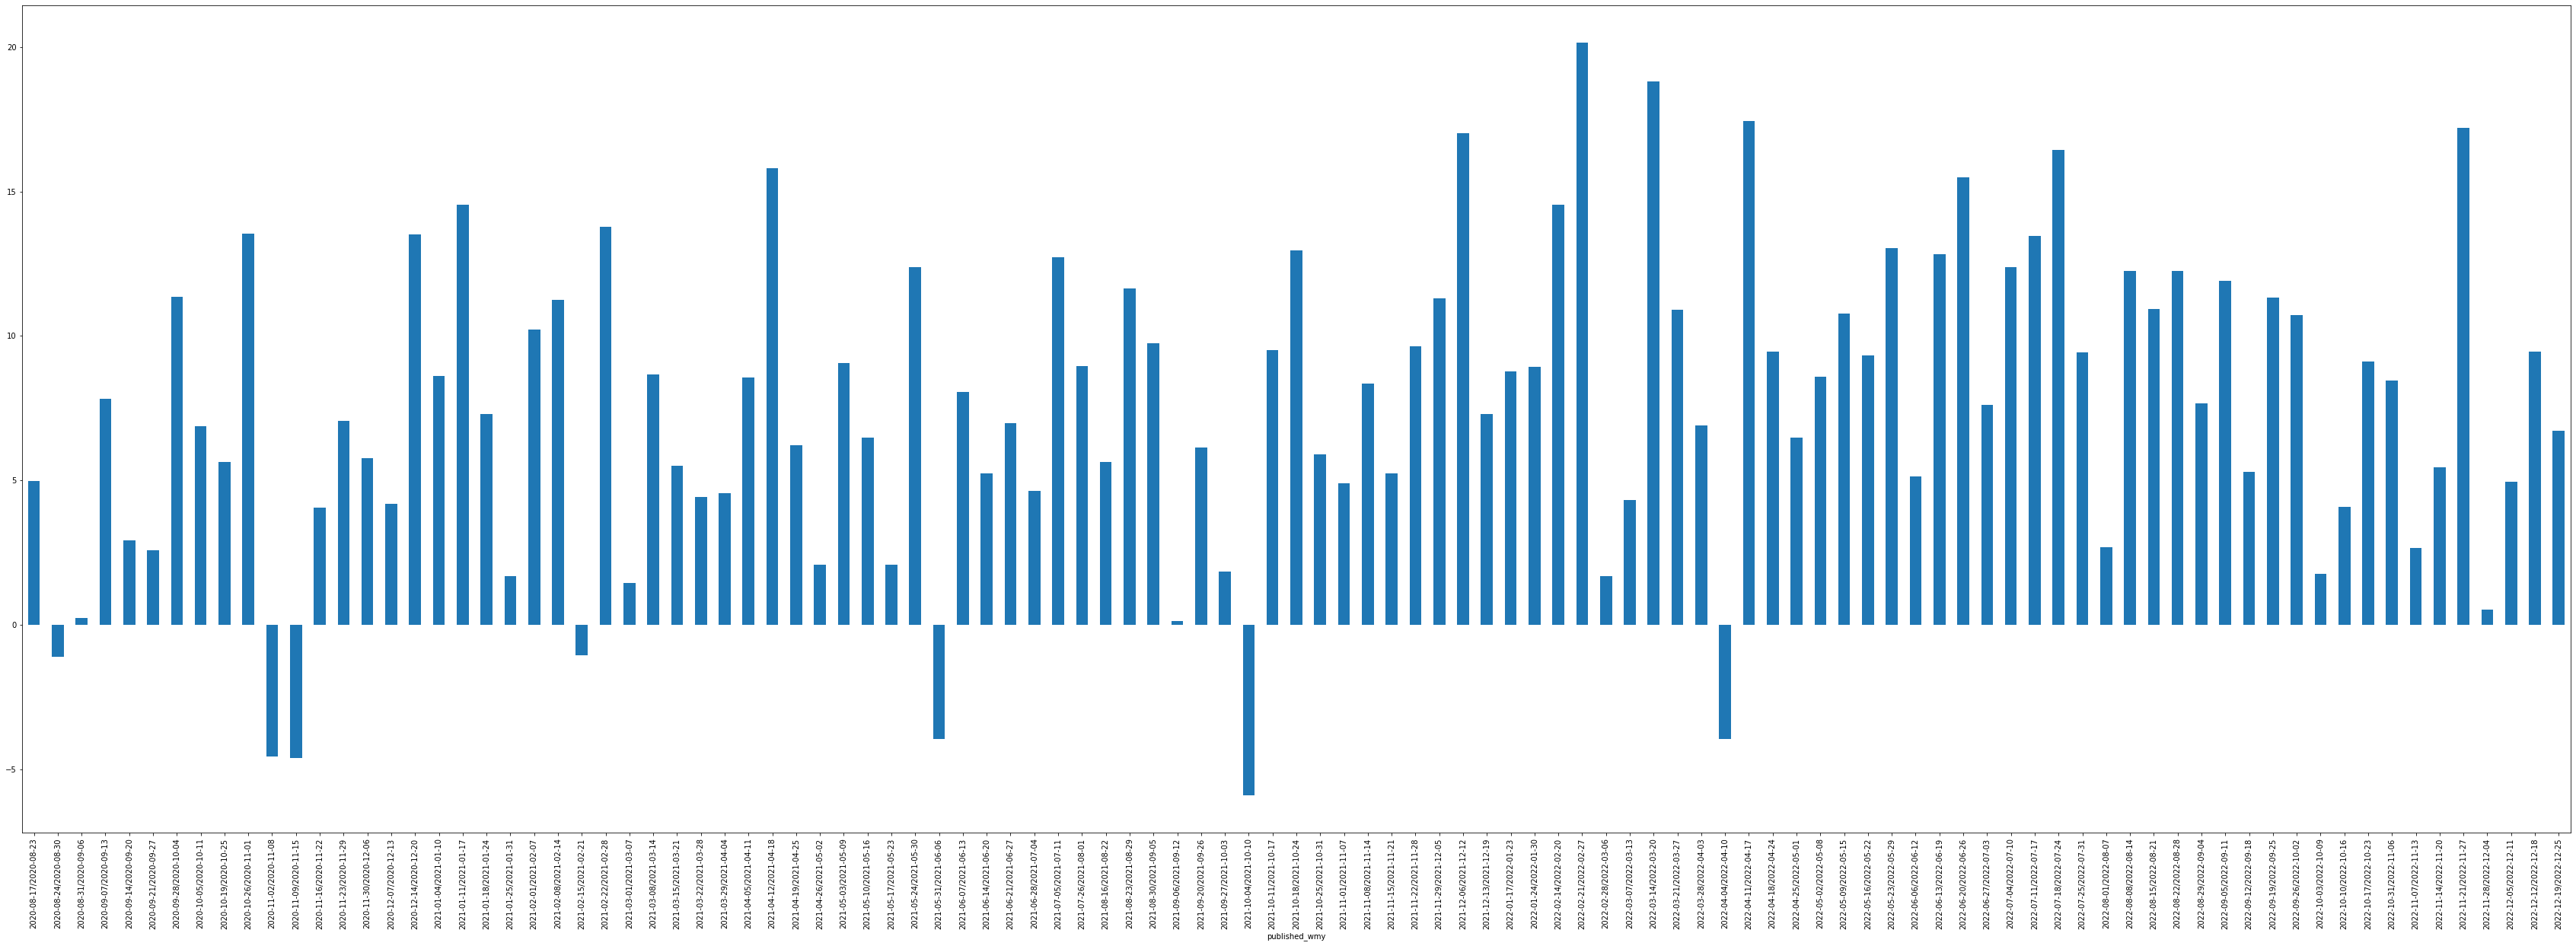

In [ ]:
h3_streams.groupby(['published_wmy'])['start_dif'].mean().plot(kind='bar',
                                                              figsize=(60,20))

### Difference by month

In [ ]:
len(h3_streams)

229

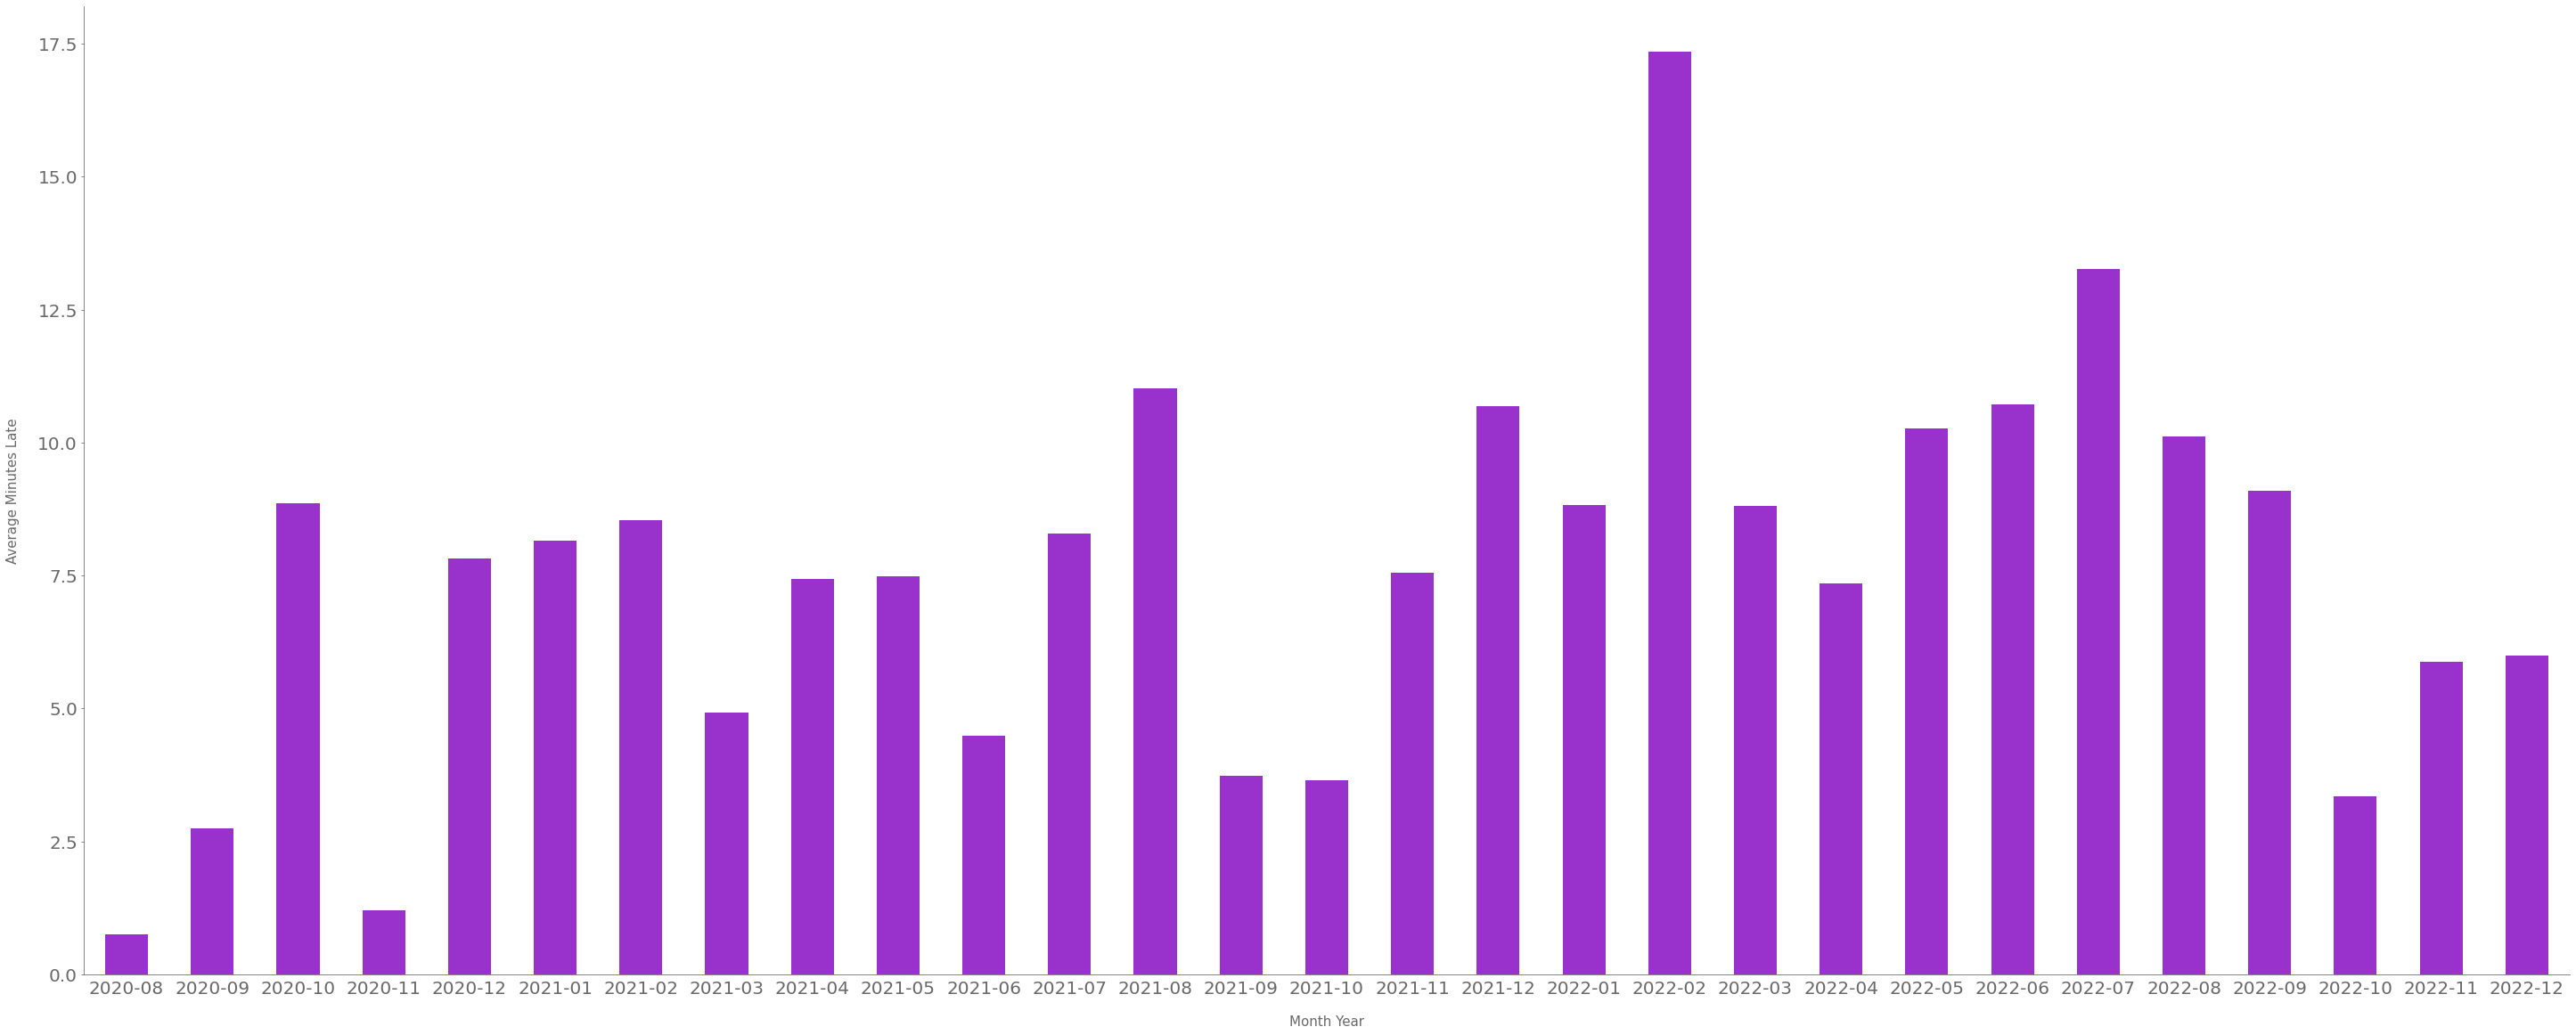

In [ ]:
ax1 = h3_streams.groupby(['published_my'])['start_dif'].mean().plot(kind='bar',
                                                                   color='darkorchid',
                                                                   rot=0,
                                                                   fontsize=20,
                                                                   figsize=(50,20))

ax1.set_ylabel('Average Minutes Late',color='dimgrey',fontsize=15,labelpad=20)
ax1.set_xlabel('Month Year',color='dimgrey',fontsize=15,labelpad=20)

plt.tick_params(bottom = False)

ax1.spines['bottom'].set_color('dimgrey')
ax1.spines['left'].set_color('dimgrey')
ax1.tick_params(axis='x', colors='dimgrey')
ax1.tick_params(axis='y', colors='dimgrey')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

In [ ]:
ax1.figure.savefig('foo.png',transparent=True)

### Count by series

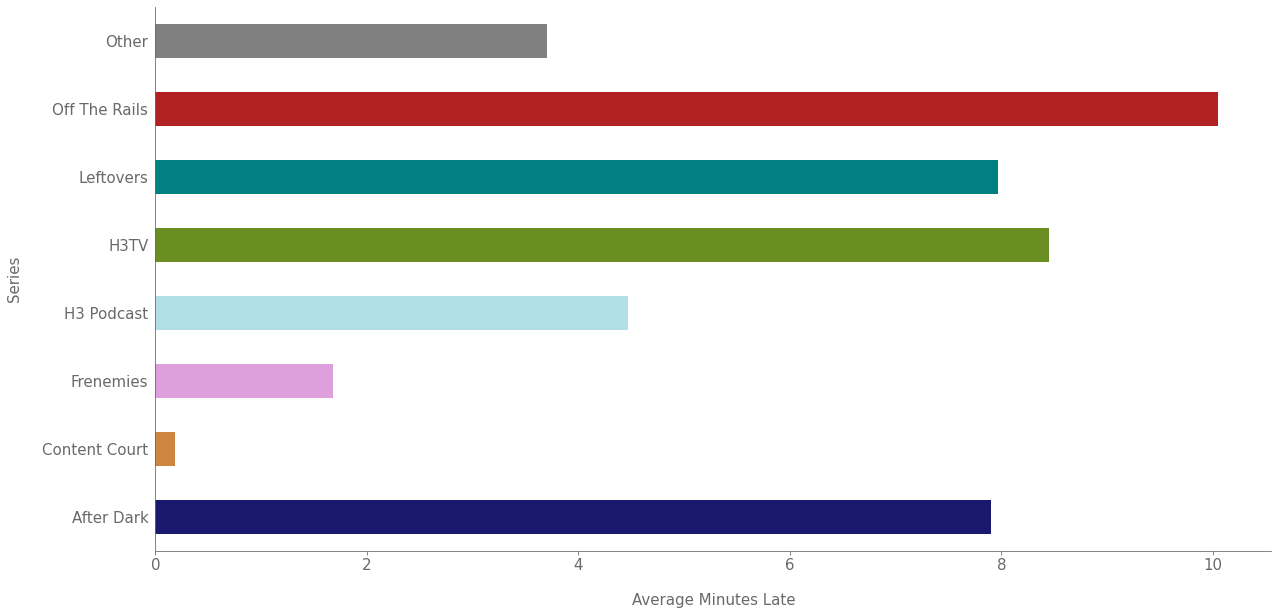

In [ ]:
c = ['midnightblue','peru','plum','powderblue','olivedrab','teal','firebrick','grey']

ax2 = h3_streams.groupby(['series'])['start_dif'].mean().plot(kind='barh',color=c,
                                                             fontsize=15,figsize=(20,10))

ax2.set_xlabel('Average Minutes Late',color='dimgrey',fontsize=15,labelpad=20)
ax2.set_ylabel('Series',color='dimgrey',fontsize=15,labelpad=20)

plt.tick_params(left = False)
ax2.spines['bottom'].set_color('dimgrey')
ax2.spines['left'].set_color('dimgrey')
ax2.tick_params(axis='x', colors='dimgrey')
ax2.tick_params(axis='y', colors='dimgrey')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

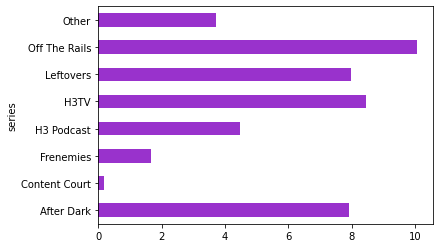

In [ ]:
h3_streams.groupby(['series'])['start_dif'].mean().plot(kind='barh',color='darkorchid')

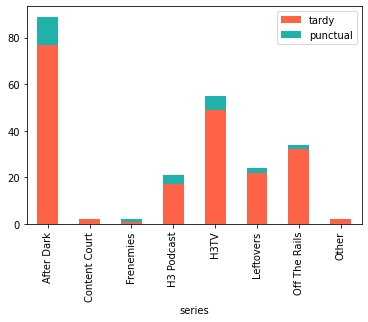

In [ ]:
temp = h3_streams.groupby(['series']).agg(tardy=('tardy','sum'),total=('tardy','count'))
temp['punctual'] = temp['total'] - temp['tardy']

temp[['tardy','punctual']].plot(kind='barh',
                                stacked=True,
                                color=['tomato','lightseagreen'])

# Other